In [1]:
import os
import random
import librosa
from tqdm import tqdm
from pydub import AudioSegment
import numpy as np
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt






c:\users\ysiberia\documents\github\audiio_classification\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2,figsize=(10,10))
    librosa.display.waveshow(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveshow(augmented_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Augmented signal")
    plt.show()

In [3]:
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [4]:
def time_stretch(signal, time_stretch_rate):
    """Time stretching implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.time_stretch(signal, time_stretch_rate)

In [5]:
def pitch_scale(signal, sr, num_semitones):
    """Pitch scaling implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

In [6]:
def random_gain(signal, min_factor=0.5, max_factor=2):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    return augmented_signal

In [7]:
def invert_polarity(signal):
    return signal * -1

22050


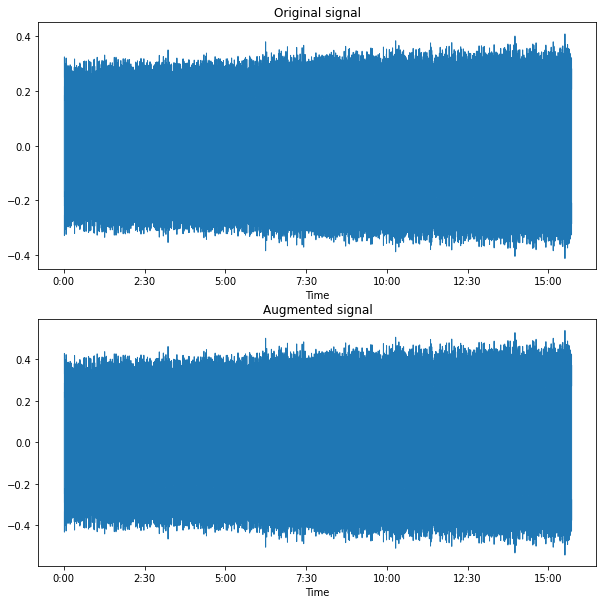

In [8]:
signal, sr = librosa.load(r"original_data/Test1.wav")
print(sr)
augmented_signal = random_gain(signal)
sf.write("augmented_audio.wav", augmented_signal, sr)
_plot_signal_and_augmented_signal(signal, augmented_signal, sr)

In [9]:
def augmentation(signal,min_noise_percentage_factor = 0.1,
                 max_noise_percentage_factor = 0.5,
                 min_factor=0.5, 
                 max_factor=1.5):
    noise_percentage_factor = random.uniform(min_noise_percentage_factor, max_noise_percentage_factor)
    augmented_signal = add_white_noise(signal, noise_percentage_factor)
    augmented_signal = random_gain(augmented_signal,min_factor=0.5, max_factor=2)
    
    return augmented_signal

In [20]:
def split_audo_with_augmentation(audio:str,
                                 audio_folder:str,
                                 sample_length:int,
                                 sample_count:int,
                                 min_noise_percentage_factor = 0.0,
                                 max_noise_percentage_factor = 0.8,
                                 min_factor=0.5, 
                                 max_factor=2):
    '''
    Данная функция генерирует из одного большого аудио файла много файлов поменьше, 
    из которых будет составляться датасет. Все сгенерированные аудио попадают в отдельную директорию, 
    имеющую название исходного файла. 
    
    ==Input==
    audio - путь к исходному файлу
    audio_folder - директория в котороую будет осуществляться генерация
    sample_length - длина генерируемого примера в секундах
    sample_count - количество примеров
    '''
    # проверяем/создаем директорию audio_folder/filename/
    if not os.path.exists(audio_folder):
        os.makedirs(audio_folder)
    sub_folder = os.path.basename(audio).split('.')[0]
    sample_folder = os.path.join(audio_folder,sub_folder)
    if not os.path.exists(sample_folder):
        os.makedirs(sample_folder)

    signal, sr = librosa.load(audio) # считываем ауди

    length = librosa.get_duration(y=signal, sr=sr)

    max = int(length - sample_length -1) # получаем длину аудио
    for i in range(0,sample_count): # с
        start = random.randint(0, max)*sr
        end = start + sample_length*sr
        sound = signal[start:end]
        
        noise_percentage_factor = random.uniform(min_noise_percentage_factor, 
                                                 max_noise_percentage_factor)
        
        gain_rate = random.uniform(min_factor, max_factor)
        sound = add_white_noise(sound,noise_percentage_factor)
        #sound = random_gain(sound,gain_rate)
        sample_name = sub_folder+f'_{i}_.wav'
        sample_path=os.path.join(sample_folder,sample_name)

        sf.write(sample_path, sound, sr)

        #sample.export(sample_path, format="wav")

In [21]:
def split_all_audio(audio_path:str,audio_folder:str,sample_length:int,sample_count:int):
    '''
    Данная функция в цикле применит функцию split_audo к каждому файлу в директории с расширением wav
    ==Input==
    audio_path - директория с исходными файлами
    audio_folder - директория в котороую будет осуществляться генерация
    sample_length - длина генерируемого примера в секундах
    sample_count - количество примеров
    
    '''
    for subdir, dirs, files in os.walk(audio_path):
            print(subdir)
            for file in tqdm(files):
                filepath = subdir + os.sep + file
                if filepath.endswith(".wav"):
                    print(filepath)
                    split_audo_with_augmentation(filepath,audio_folder,sample_length,sample_count)

In [22]:
split_all_audio('./original_data','./split_10_noise_gaine',10,300)

./original_data


  0%|                                                                                      | 0/13 [00:00<?, ?it/s]

./original_data\Test1.wav


  8%|█████▉                                                                       | 1/13 [02:03<24:42, 123.58s/it]

./original_data\Test10.wav


 15%|████████████                                                                  | 2/13 [02:15<10:36, 57.84s/it]

./original_data\Test11.wav


 23%|██████████████████                                                            | 3/13 [02:42<07:16, 43.66s/it]

./original_data\Test12.wav


 31%|████████████████████████                                                      | 4/13 [03:11<05:43, 38.12s/it]

./original_data\Test13.wav


 38%|██████████████████████████████                                                | 5/13 [03:42<04:43, 35.44s/it]

./original_data\Test2.wav


 46%|████████████████████████████████████                                          | 6/13 [04:10<03:50, 32.93s/it]

./original_data\Test3.wav


 54%|██████████████████████████████████████████                                    | 7/13 [04:37<03:05, 30.92s/it]

./original_data\Test4.wav


 62%|████████████████████████████████████████████████                              | 8/13 [05:04<02:29, 29.85s/it]

./original_data\Test5.wav


 69%|██████████████████████████████████████████████████████                        | 9/13 [05:31<01:55, 28.92s/it]

./original_data\Test6.wav


 77%|███████████████████████████████████████████████████████████▏                 | 10/13 [05:51<01:17, 25.94s/it]

./original_data\Test7.wav


 85%|█████████████████████████████████████████████████████████████████▏           | 11/13 [06:17<00:52, 26.17s/it]

./original_data\Test9.wav


100%|█████████████████████████████████████████████████████████████████████████████| 13/13 [06:28<00:00, 29.92s/it]


In [1]:
import os
import random
import numpy as np
from tqdm import tqdm
from pydub import AudioSegment

c:\users\ysiberia\documents\github\audiio_classification\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
Audio = AudioSegment.from_wav('./splited_data_5/Test1/Test1_0_.wav')

In [6]:
type(Audio)

pydub.audio_segment.AudioSegment

In [2]:
def split_audo(audio:str,audio_folder:str,sample_length:int,sample_count:int):
    '''
    Данная функция генерирует из одного большого аудио файла много файлов поменьше, 
    из которых будет составляться датасет. Все сгенерированные аудио попадают в отдельную директорию, 
    имеющую название исходного файла. 
    
    ==Input==
    audio - путь к исходному файлу
    audio_folder - директория в котороую будет осуществляться генерация
    sample_length - длина генерируемого примера в секундах
    sample_count - количество примеров
    '''
    # проверяем/создаем директорию audio_folder/filename/
    if not os.path.exists(audio_folder):
        os.makedirs(audio_folder)
    sub_folder = os.path.basename(audio).split('.')[0]
    sample_folder = os.path.join(audio_folder,sub_folder)
    if not os.path.exists(sample_folder):
        os.makedirs(sample_folder)

    Audio = AudioSegment.from_wav(audio) # считываем аудио
    max = int(Audio.duration_seconds - sample_length - 1) # получаем длину аудио
    for i in range(0,sample_count): # с
        start = random.randint(0, max)
        end = start + sample_length
        sample = Audio[start*1000:end*1000]
        sample_name = sub_folder+f'_{i}_.wav'
        sample_path=os.path.join(sample_folder,sample_name)
        sample.export(sample_path, format="wav")

In [3]:
def split_all_audio(audio_path:str,audio_folder:str,sample_length:int,sample_count:int):
    '''
    Данная функция в цикле применит функцию split_audo к каждому файлу в директории с расширением wav
    ==Input==
    audio_path - директория с исходными файлами
    audio_folder - директория в котороую будет осуществляться генерация
    sample_length - длина генерируемого примера в секундах
    sample_count - количество примеров
    
    '''
    for subdir, dirs, files in os.walk(audio_path):
            print(subdir)
            for file in tqdm(files):
                filepath = subdir + os.sep + file
                if filepath.endswith(".wav"):
                    split_audo(filepath,audio_folder,sample_length,sample_count)

In [4]:
split_all_audio('./original_data','./splited_data_5',5,10)

./original_data


100%|█████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.72it/s]


In [ ]:
split_all_audio('./original_data','./splited_data_10',10,70)